In [4]:
# # from google.colab import auth
# # auth.authenticate_user()

# from google.colab import drive
# drive.mount('/content/gdrive')

In [5]:
# # 경로 변경
# cd /content/gdrive/My Drive/AIBM/20191030/

In [1]:
import pandas as pd
import numpy as np
import os

#os.chdir("C://Users//이명아//Desktop")

In [2]:
data = pd.read_csv("국가건강검진_혈압혈당데이터.csv", engine = 'python')

In [3]:
data.head()

,SEX,BTH_G,SBP,DBP,FBS,DIS,BMI
0,1,1,116,78,94,4,16.6
1,1,1,100,60,79,4,22.3
2,1,1,100,60,87,4,21.9
3,1,1,111,70,72,4,20.2
4,1,1,120,80,98,4,20.0


## 데이터 범주화 및 y라벨 설정

In [9]:
data['SBP_Y'] = data['SBP'].apply(lambda x : 0 if x < 120 else 1 ) # 위험:1 정상:0

In [10]:
data['DBP_Y'] = data['DBP'].apply(lambda x : 0 if x < 80 else 1 ) # 위험:1 정상:0

In [11]:
data['FBS_Y'] = data['FBS'].apply(lambda x : 0 if x < 126 else 1 ) # 위험:1 정상:0

In [12]:
data['BMI_Y'] = data['BMI'].apply(lambda x : 0 if x < 27 else 1 ) # 위험:1 정상:0

In [13]:
data.head()

,SEX,BTH_G,SBP,DBP,FBS,DIS,BMI,SBP_Y,DBP_Y,FBS_Y,BMI_Y
0,1,1,116,78,94,4,16.6,0,0,0,0
1,1,1,100,60,79,4,22.3,0,0,0,0
2,1,1,100,60,87,4,21.9,0,0,0,0
3,1,1,111,70,72,4,20.2,0,0,0,0
4,1,1,120,80,98,4,20.0,1,1,0,0


In [14]:
type(data)

pandas.core.frame.DataFrame

In [15]:
def healthcheck1 (row):
   if row['FBS_Y'] == 1 : #  (당뇨)
      return 1
   return 0

In [16]:
def healthcheck2(row):
    if row['FBS_Y'] + row['SBP_Y'] + row['DBP_Y'] + row['BMI_Y'] == 4 : # 당뇨 + 고혈압 + 과체중
        return 4
    if row['FBS_Y'] + row['SBP_Y'] + row['DBP_Y']  == 3 : # 당뇨 + 고혈압
        return 3
    if row['SBP_Y'] + row['DBP_Y']  == 2 : #고혈압
        return 2
    if row['FBS_Y'] == 1 :  # 당뇨
        return 1
    return 0

In [17]:
data['HEALTH1'] = data.apply(lambda row : healthcheck1(row), axis = 1)

In [18]:
data['HEALTH2'] = data.apply(lambda row : healthcheck2(row), axis = 1)

In [19]:
data.head()

,SEX,BTH_G,SBP,DBP,FBS,DIS,BMI,SBP_Y,DBP_Y,FBS_Y,BMI_Y,HEALTH1,HEALTH2
0,1,1,116,78,94,4,16.6,0,0,0,0,0,0
1,1,1,100,60,79,4,22.3,0,0,0,0,0,0
2,1,1,100,60,87,4,21.9,0,0,0,0,0,0
3,1,1,111,70,72,4,20.2,0,0,0,0,0,0
4,1,1,120,80,98,4,20.0,1,1,0,0,0,2


## 데이터 탐색

In [20]:
# 건강 체크
# 0: 정상
# 1: 당뇨
# 2: 고혈압,
# 3: 당뇨 + 고혈압
# 4: 당뇨 + 고혈압 + 과체중

data['HEALTH1'].value_counts()   #불균형 심함

0    929046
1     70954
Name: HEALTH1, dtype: int64

In [21]:
data['HEALTH2'].value_counts()   #불균형 심함

0    583320
2    345726
1     34306
3     24855
4     11793
Name: HEALTH2, dtype: int64

# 로지스틱 회귀

In [22]:
data.head()

,SEX,BTH_G,SBP,DBP,FBS,DIS,BMI,SBP_Y,DBP_Y,FBS_Y,BMI_Y,HEALTH1,HEALTH2
0,1,1,116,78,94,4,16.6,0,0,0,0,0,0
1,1,1,100,60,79,4,22.3,0,0,0,0,0,0
2,1,1,100,60,87,4,21.9,0,0,0,0,0,0
3,1,1,111,70,72,4,20.2,0,0,0,0,0,0
4,1,1,120,80,98,4,20.0,1,1,0,0,0,2


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Y = data['HEALTH1']
X = data[['SEX', 'BTH_G', 'SBP_Y', 'DBP_Y', 'BMI_Y']]

#X = data_sample.iloc[:,0:10]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3)

In [24]:
X.head()

,SEX,BTH_G,SBP_Y,DBP_Y,BMI_Y
0,1,1,0,0,0
1,1,1,0,0,0
2,1,1,0,0,0
3,1,1,0,0,0
4,1,1,1,1,0


In [25]:
log_clf = LogisticRegression()

log_clf.fit(X_train, Y_train)
log_clf.score(X_test, Y_test) 

0.9291

# 덴드로그램

In [26]:
import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [27]:
data_sample = data.sample(n=100, random_state = 1234)

In [28]:
columns = ['SEX','BTH_G','DIS','SBP_Y','DBP_Y','FBS_Y', 'BMI_Y', 'HEALTH1']

data_cluster= data_sample[columns]
x_columns = ['SEX','BTH_G','DIS','SBP_Y','DBP_Y','FBS_Y', 'BMI_Y']
  # 유의한 변수들만 선별(SBP 제외)
y_columns = 'HEALTH1'

In [29]:
data_cluster.head()

,SEX,BTH_G,DIS,SBP_Y,DBP_Y,FBS_Y,BMI_Y,HEALTH1
433572,1,21,4,1,0,0,0,0
254298,1,13,4,1,0,0,1,0
686334,2,12,4,0,0,0,0,0
866486,2,19,4,1,1,0,0,0
649015,2,10,4,0,0,0,0,0


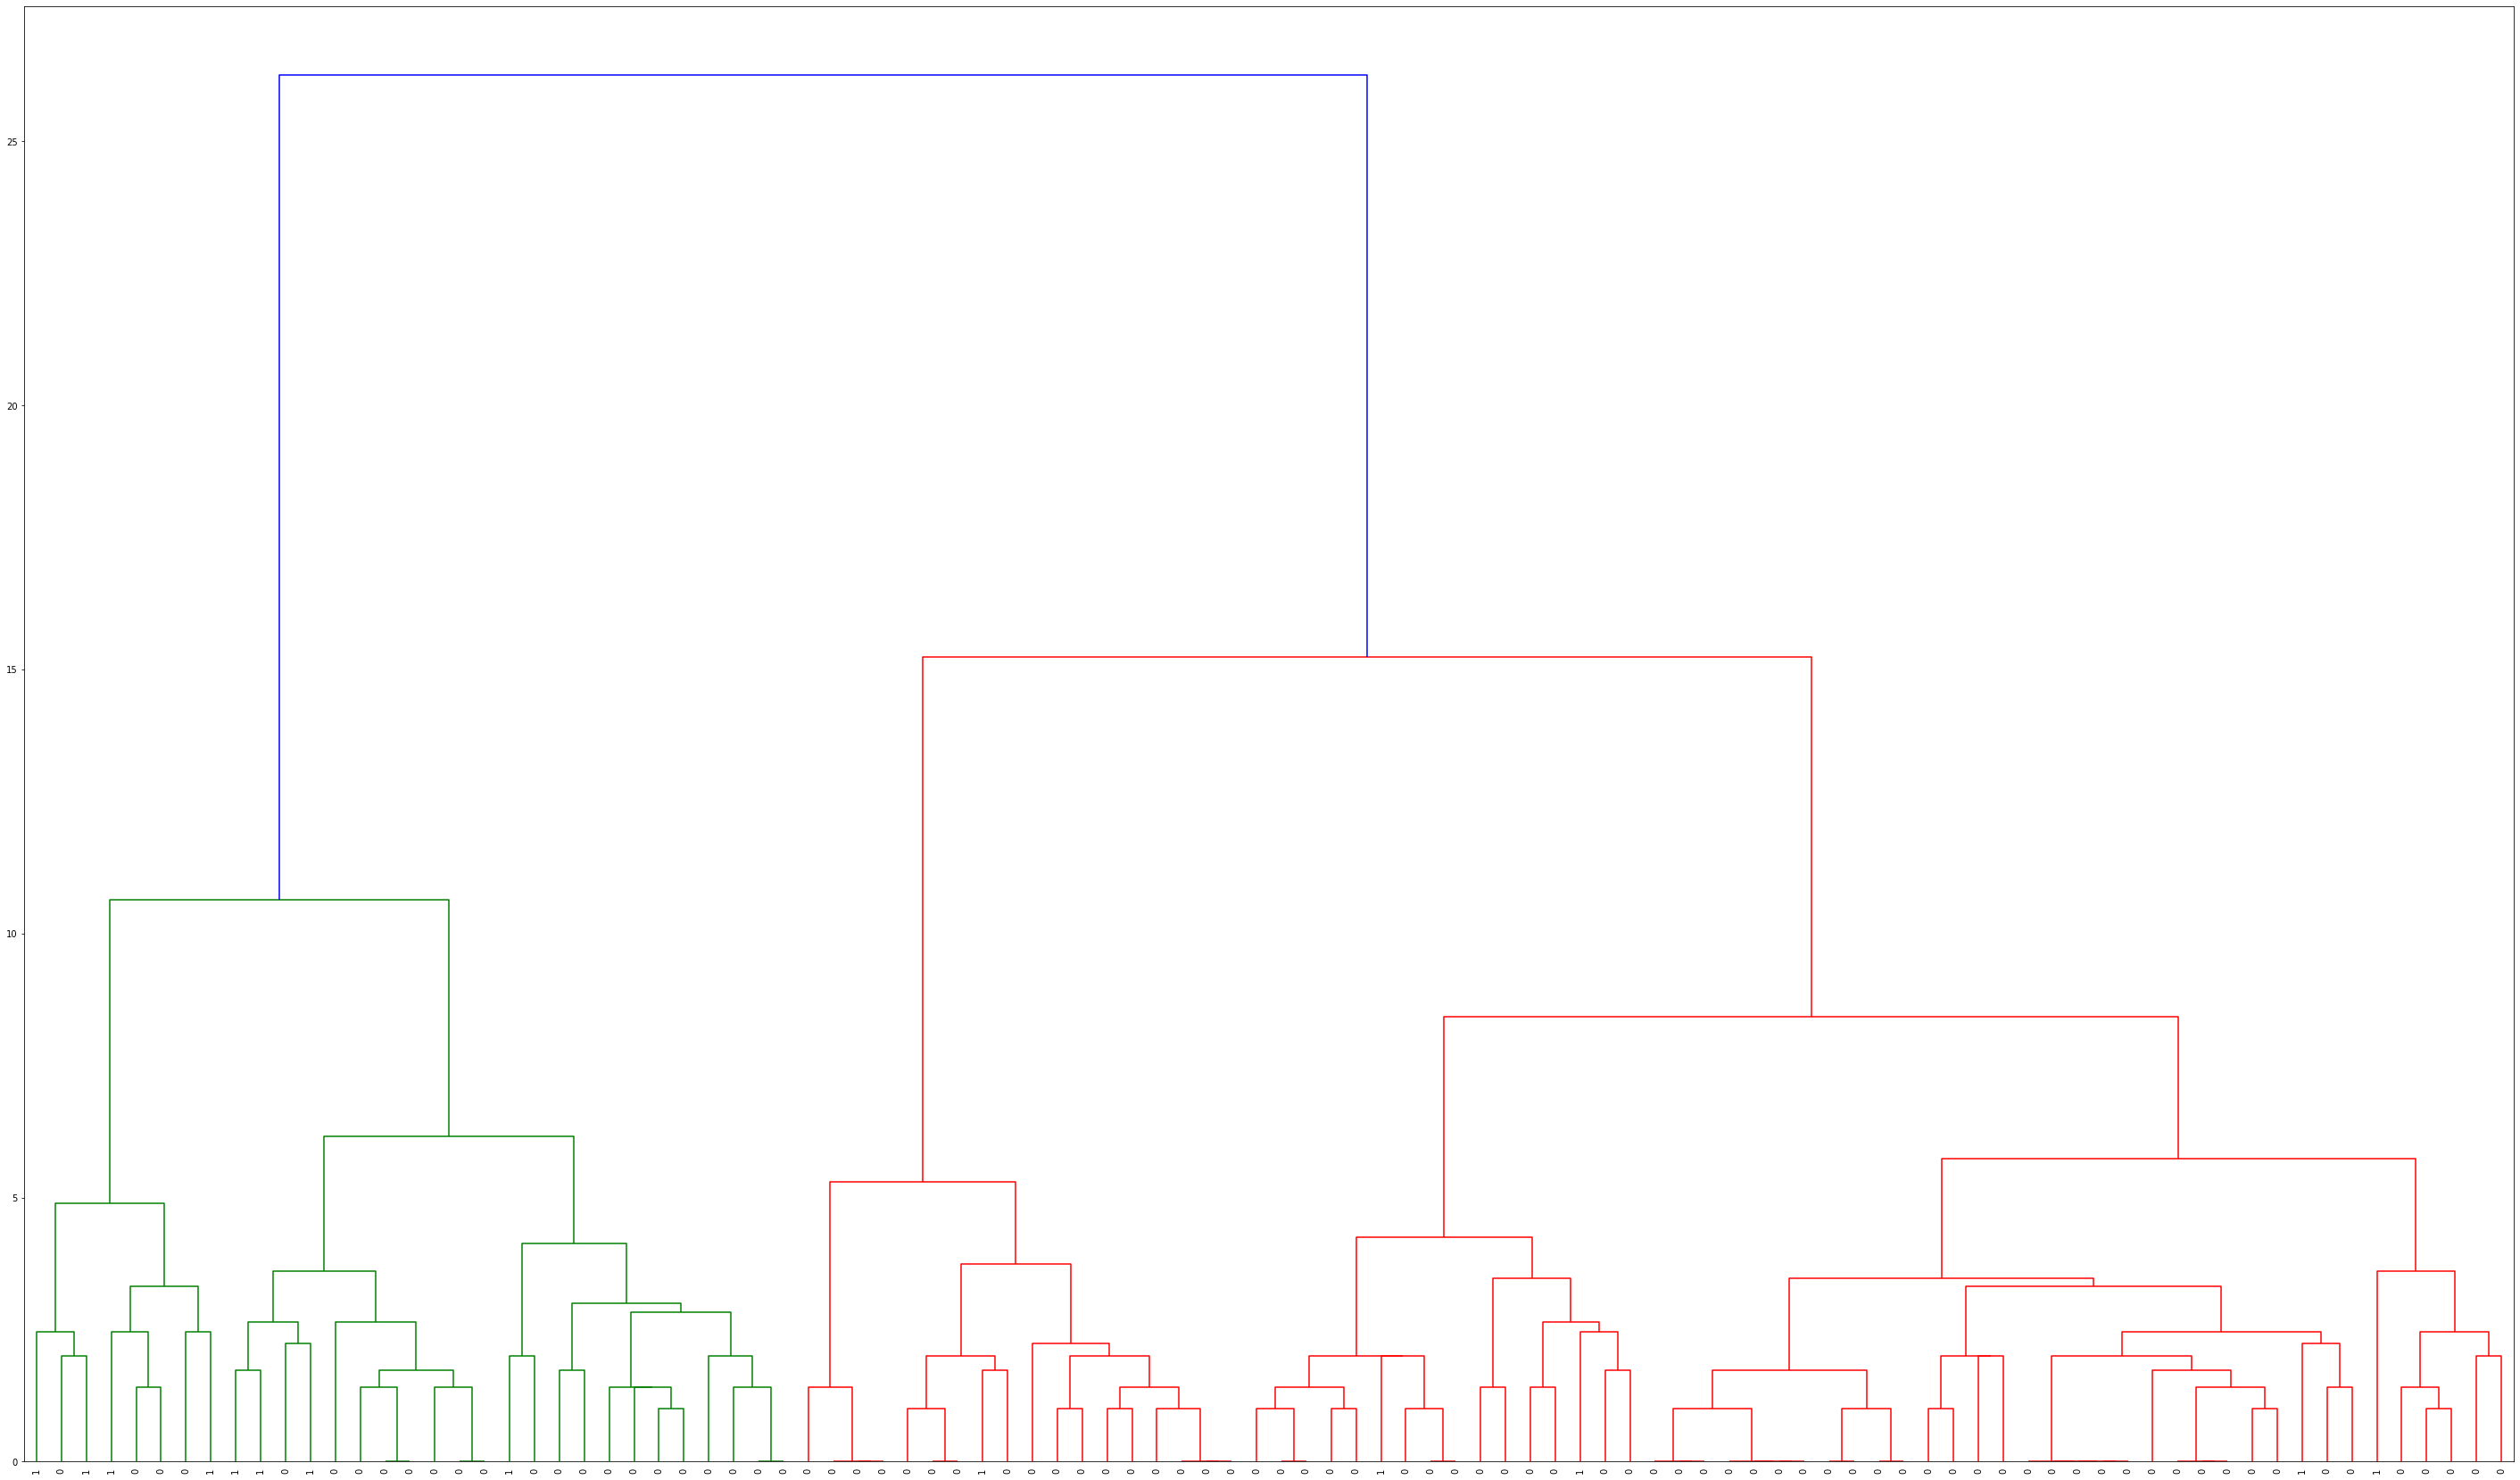

In [31]:
# dendrogram 

from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(data_cluster,method='complete')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(50,30))
dendrogram(mergings,
           labels = data_cluster['HEALTH1'].to_numpy(),
           leaf_rotation=90,
           leaf_font_size=10,
)
plt.show()


# 군집분석(Kmeans) - 전체 데이터

In [32]:
# age blood_pressure bmi fbs diastolic(이완기) dis 를 이용한 군집분석
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [33]:
data_cluster.columns

Index(['SEX', 'BTH_G', 'DIS', 'SBP_Y', 'DBP_Y', 'FBS_Y', 'BMI_Y', 'HEALTH1'], dtype='object')

In [34]:
#feature = data_sample[['SEX', 'BTH_G', 'SBP', 'DBP', 'FBS', 'DIS', 'BMI', 'SBP_A', 'DBP_A','FBS_A', 'BMI_A', 'HEALTH']]
#feature = data[['SEX', 'BTH_G', 'DIS', 'SBP_Y', 'DBP_Y', 'FBS_Y', 'BMI_Y','FBS_Y']]
feature = data[['SEX', 'BTH_G', 'DIS', 'SBP_Y', 'DBP_Y', 'FBS_Y', 'BMI_Y','FBS_Y','SBP', 'DBP', 'FBS','BMI']]

In [35]:
#label = data_sample[['diabetes']]
label = data[['HEALTH1']]

In [36]:
feature.head()

,SEX,BTH_G,DIS,SBP_Y,DBP_Y,FBS_Y,BMI_Y,FBS_Y,SBP,DBP,FBS,BMI
0,1,1,4,0,0,0,0,0,116,78,94,16.6
1,1,1,4,0,0,0,0,0,100,60,79,22.3
2,1,1,4,0,0,0,0,0,100,60,87,21.9
3,1,1,4,0,0,0,0,0,111,70,72,20.2
4,1,1,4,1,1,0,0,0,120,80,98,20.0


In [37]:
len(feature)

1000000

In [38]:
model = KMeans(n_clusters=5,algorithm='auto')

model.fit(feature)  # 모델 학습
predict = pd.DataFrame(model.predict(feature))  # 모델 예측
predict.columns=['cluster_label']

In [39]:
feature.reset_index(drop=True, inplace=True)
predict.reset_index(drop=True, inplace=True)

new_data = pd.concat([feature, predict], axis = 1)

In [40]:
label.reset_index(drop = True, inplace = True)

new_data =  pd.concat([new_data, label], axis = 1)
new_data.head()

,SEX,BTH_G,DIS,SBP_Y,DBP_Y,FBS_Y,BMI_Y,FBS_Y,SBP,DBP,FBS,BMI,cluster_label,HEALTH1
0,1,1,4,0,0,0,0,0,116,78,94,16.6,3,0
1,1,1,4,0,0,0,0,0,100,60,79,22.3,0,0
2,1,1,4,0,0,0,0,0,100,60,87,21.9,0,0
3,1,1,4,0,0,0,0,0,111,70,72,20.2,0,0
4,1,1,4,1,1,0,0,0,120,80,98,20.0,3,0


In [41]:
new_data['cluster_label'].value_counts()

3    408149
0    313897
2    157883
4    104308
1     15763
Name: cluster_label, dtype: int64

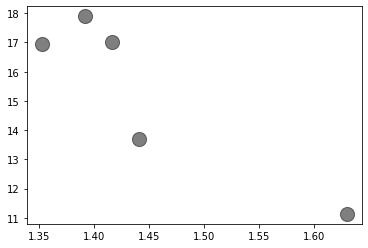

In [42]:
#plot 시각화

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [43]:
## 군집 별 특성 찾기 

cluster1 = new_data[new_data['cluster_label']==0] 
cluster2 = new_data[new_data['cluster_label']==1] 
cluster3 = new_data[new_data['cluster_label']==2] 
cluster4 = new_data[new_data['cluster_label']==3]  
cluster5 = new_data[new_data['cluster_label']==4]

### 클러스터별 통계량 추출

In [44]:
def makestat(df):
    print(df.describe())
    print("***********************************************************************************")
    print(df.groupby('DIS').count())  # 성별 수 
    print("***********************************************************************************")
    print(df['HEALTH1'].value_counts()/df.count()[0]*100)    # HEALTH 구성 비율
    print("***********************************************************************************")
    print(df.groupby('SEX').count().loc[1,:][0]/df.count()[0]*100)  # 당뇨환자 비율 (에러발생 -> 당뇨환자 0인것)


In [45]:
makestat(cluster1)

                 SEX          BTH_G            DIS          SBP_Y  \
count  313897.000000  313897.000000  313897.000000  313897.000000   
mean        1.629633      11.135503       3.834465       0.013517   
std         0.482904       6.476165       0.563176       0.115475   
min         1.000000       1.000000       1.000000       0.000000   
25%         1.000000       6.000000       4.000000       0.000000   
50%         2.000000      11.000000       4.000000       0.000000   
75%         2.000000      16.000000       4.000000       0.000000   
max         2.000000      27.000000       4.000000       1.000000   

               DBP_Y          FBS_Y          BMI_Y          FBS_Y  \
count  313897.000000  313897.000000  313897.000000  313897.000000   
mean        0.026856       0.000016       0.066038       0.000016   
std         0.161663       0.003991       0.248348       0.003991   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.0000

In [46]:
makestat(cluster2)

                SEX         BTH_G           DIS         SBP_Y         DBP_Y  \
count  15763.000000  15763.000000  15763.000000  15763.000000  15763.000000   
mean       1.352471     16.931485      2.423333      0.752966      0.557445   
std        0.477755      5.774722      1.175666      0.431300      0.496705   
min        1.000000      1.000000      1.000000      0.000000      0.000000   
25%        1.000000     13.000000      1.000000      1.000000      0.000000   
50%        1.000000     17.000000      3.000000      1.000000      1.000000   
75%        2.000000     21.000000      3.000000      1.000000      1.000000   
max        2.000000     27.000000      4.000000      1.000000      1.000000   

         FBS_Y         BMI_Y    FBS_Y           SBP           DBP  \
count  15763.0  15763.000000  15763.0  15763.000000  15763.000000   
mean       1.0      0.272981      1.0    128.604009     79.133350   
std        0.0      0.445505      0.0     15.382098     10.076769   
min        1

In [47]:
makestat(cluster3)

                 SEX          BTH_G            DIS          SBP_Y  \
count  157883.000000  157883.000000  157883.000000  157883.000000   
mean        1.416112      17.002077       3.059968       0.999994   
std         0.492914       6.565556       1.075712       0.002517   
min         1.000000       1.000000       1.000000       0.000000   
25%         1.000000      12.000000       2.000000       1.000000   
50%         1.000000      17.000000       4.000000       1.000000   
75%         2.000000      22.000000       4.000000       1.000000   
max         2.000000      27.000000       4.000000       1.000000   

               DBP_Y          FBS_Y          BMI_Y          FBS_Y  \
count  157883.000000  157883.000000  157883.000000  157883.000000   
mean        0.907659       0.006879       0.263714       0.006879   
std         0.289507       0.082651       0.440648       0.082651   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       0.0000

In [48]:
makestat(cluster4)

                 SEX          BTH_G            DIS          SBP_Y  \
count  408149.000000  408149.000000  408149.000000  408149.000000   
mean        1.441140      13.699688       3.584465       0.807286   
std         0.496524       6.858230       0.841647       0.394431   
min         1.000000       1.000000       1.000000       0.000000   
25%         1.000000       9.000000       4.000000       1.000000   
50%         1.000000      14.000000       4.000000       1.000000   
75%         2.000000      19.000000       4.000000       1.000000   
max         2.000000      27.000000       4.000000       1.000000   

               DBP_Y     FBS_Y          BMI_Y     FBS_Y            SBP  \
count  408149.000000  408149.0  408149.000000  408149.0  408149.000000   
mean        0.492972       0.0       0.163048       0.0     124.148189   
std         0.499951       0.0       0.369410       0.0       6.125622   
min         0.000000       0.0       0.000000       0.0     100.000000   
25%     

In [49]:
makestat(cluster5)

                 SEX          BTH_G            DIS          SBP_Y  \
count  104308.000000  104308.000000  104308.000000  104308.000000   
mean        1.391427      17.900094       2.714087       0.741410   
std         0.488072       5.913831       1.205516       0.437862   
min         1.000000       1.000000       1.000000       0.000000   
25%         1.000000      14.000000       2.000000       0.000000   
50%         1.000000      18.000000       3.000000       1.000000   
75%         2.000000      22.000000       4.000000       1.000000   
max         2.000000      27.000000       4.000000       1.000000   

               DBP_Y          FBS_Y          BMI_Y          FBS_Y  \
count  104308.000000  104308.000000  104308.000000  104308.000000   
mean        0.490001       0.518656       0.251611       0.518656   
std         0.499902       0.499654       0.433941       0.499654   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.0000

# 분산분석(ANOVA)

In [50]:
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [51]:
cluster1.head()

,SEX,BTH_G,DIS,SBP_Y,DBP_Y,FBS_Y,BMI_Y,FBS_Y,SBP,DBP,FBS,BMI,cluster_label,HEALTH1
1,1,1,4,0,0,0,0,0,100,60,79,22.3,0,0
2,1,1,4,0,0,0,0,0,100,60,87,21.9,0,0
3,1,1,4,0,0,0,0,0,111,70,72,20.2,0,0
6,1,1,4,0,0,0,0,0,110,70,80,20.6,0,0
7,1,1,4,0,0,0,0,0,115,75,80,22.6,0,0


In [52]:
group1 = cluster1[['SBP', 'DBP',	'FBS',	'BMI']]
group2 = cluster2[['SBP', 'DBP',	'FBS',	'BMI']]
group3 = cluster3[['SBP', 'DBP',	'FBS',	'BMI']]
group4 = cluster4[['SBP', 'DBP',	'FBS',	'BMI']]
group5 = cluster5[['SBP', 'DBP',	'FBS',	'BMI']]

In [53]:
group1 = group1.values.tolist()
group2 = group2.values.tolist()
group3 = group3.values.tolist()
group4 = group4.values.tolist()
group5 = group5.values.tolist()

In [54]:
plot_data = [group1, group2, group3, group4, group5]

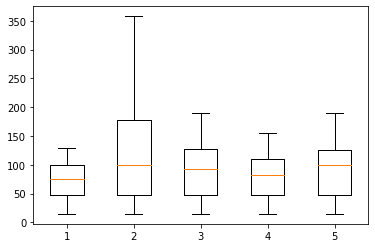

In [55]:
ax = plt.boxplot(plot_data)
plt.show()

# Kmeans - 당뇨환자(diabetes==1) 군집분석

In [56]:
data.head()

,SEX,BTH_G,SBP,DBP,FBS,DIS,BMI,SBP_Y,DBP_Y,FBS_Y,BMI_Y,HEALTH1,HEALTH2
0,1,1,116,78,94,4,16.6,0,0,0,0,0,0
1,1,1,100,60,79,4,22.3,0,0,0,0,0,0
2,1,1,100,60,87,4,21.9,0,0,0,0,0,0
3,1,1,111,70,72,4,20.2,0,0,0,0,0,0
4,1,1,120,80,98,4,20.0,1,1,0,0,0,2


In [57]:
data_diabetes = data[data['HEALTH1'] == 1]

In [58]:
data_diabetes.head()

,SEX,BTH_G,SBP,DBP,FBS,DIS,BMI,SBP_Y,DBP_Y,FBS_Y,BMI_Y,HEALTH1,HEALTH2
218,1,1,130,80,130,4,27.5,1,1,1,1,1,4
763,1,1,135,85,130,4,31.6,1,1,1,1,1,4
862,1,1,110,60,128,4,21.8,0,0,1,0,1,1
946,1,1,124,62,129,4,21.5,1,0,1,0,1,1
1109,1,1,120,80,136,4,21.4,1,1,1,0,1,3


In [59]:
data_sample = data_diabetes.sample(n=100, random_state = 1234)

In [60]:
data_sample.head()

,SEX,BTH_G,SBP,DBP,FBS,DIS,BMI,SBP_Y,DBP_Y,FBS_Y,BMI_Y,HEALTH1,HEALTH2
447656,1,22,168,100,131,1,20.8,1,1,1,0,1,3
427446,1,21,140,85,206,3,23.5,1,1,1,0,1,3
845041,2,18,110,80,126,2,23.6,0,1,1,0,1,1
221303,1,12,140,80,132,1,24.7,1,1,1,0,1,3
506228,1,27,120,70,202,3,27.3,1,0,1,1,1,1


In [61]:
columns = ['SEX','BTH_G','DIS','SBP_Y','DBP_Y','FBS_Y', 'BMI_Y','HEALTH2']

data_cluster= data_sample[columns]
x_columns = ['SEX','BTH_G','DIS','SBP_Y','DBP_Y','FBS_Y', 'BMI_Y',]
  # 유의한 변수들만 선별(SBP 제외)
y_columns = 'HEALTH2'

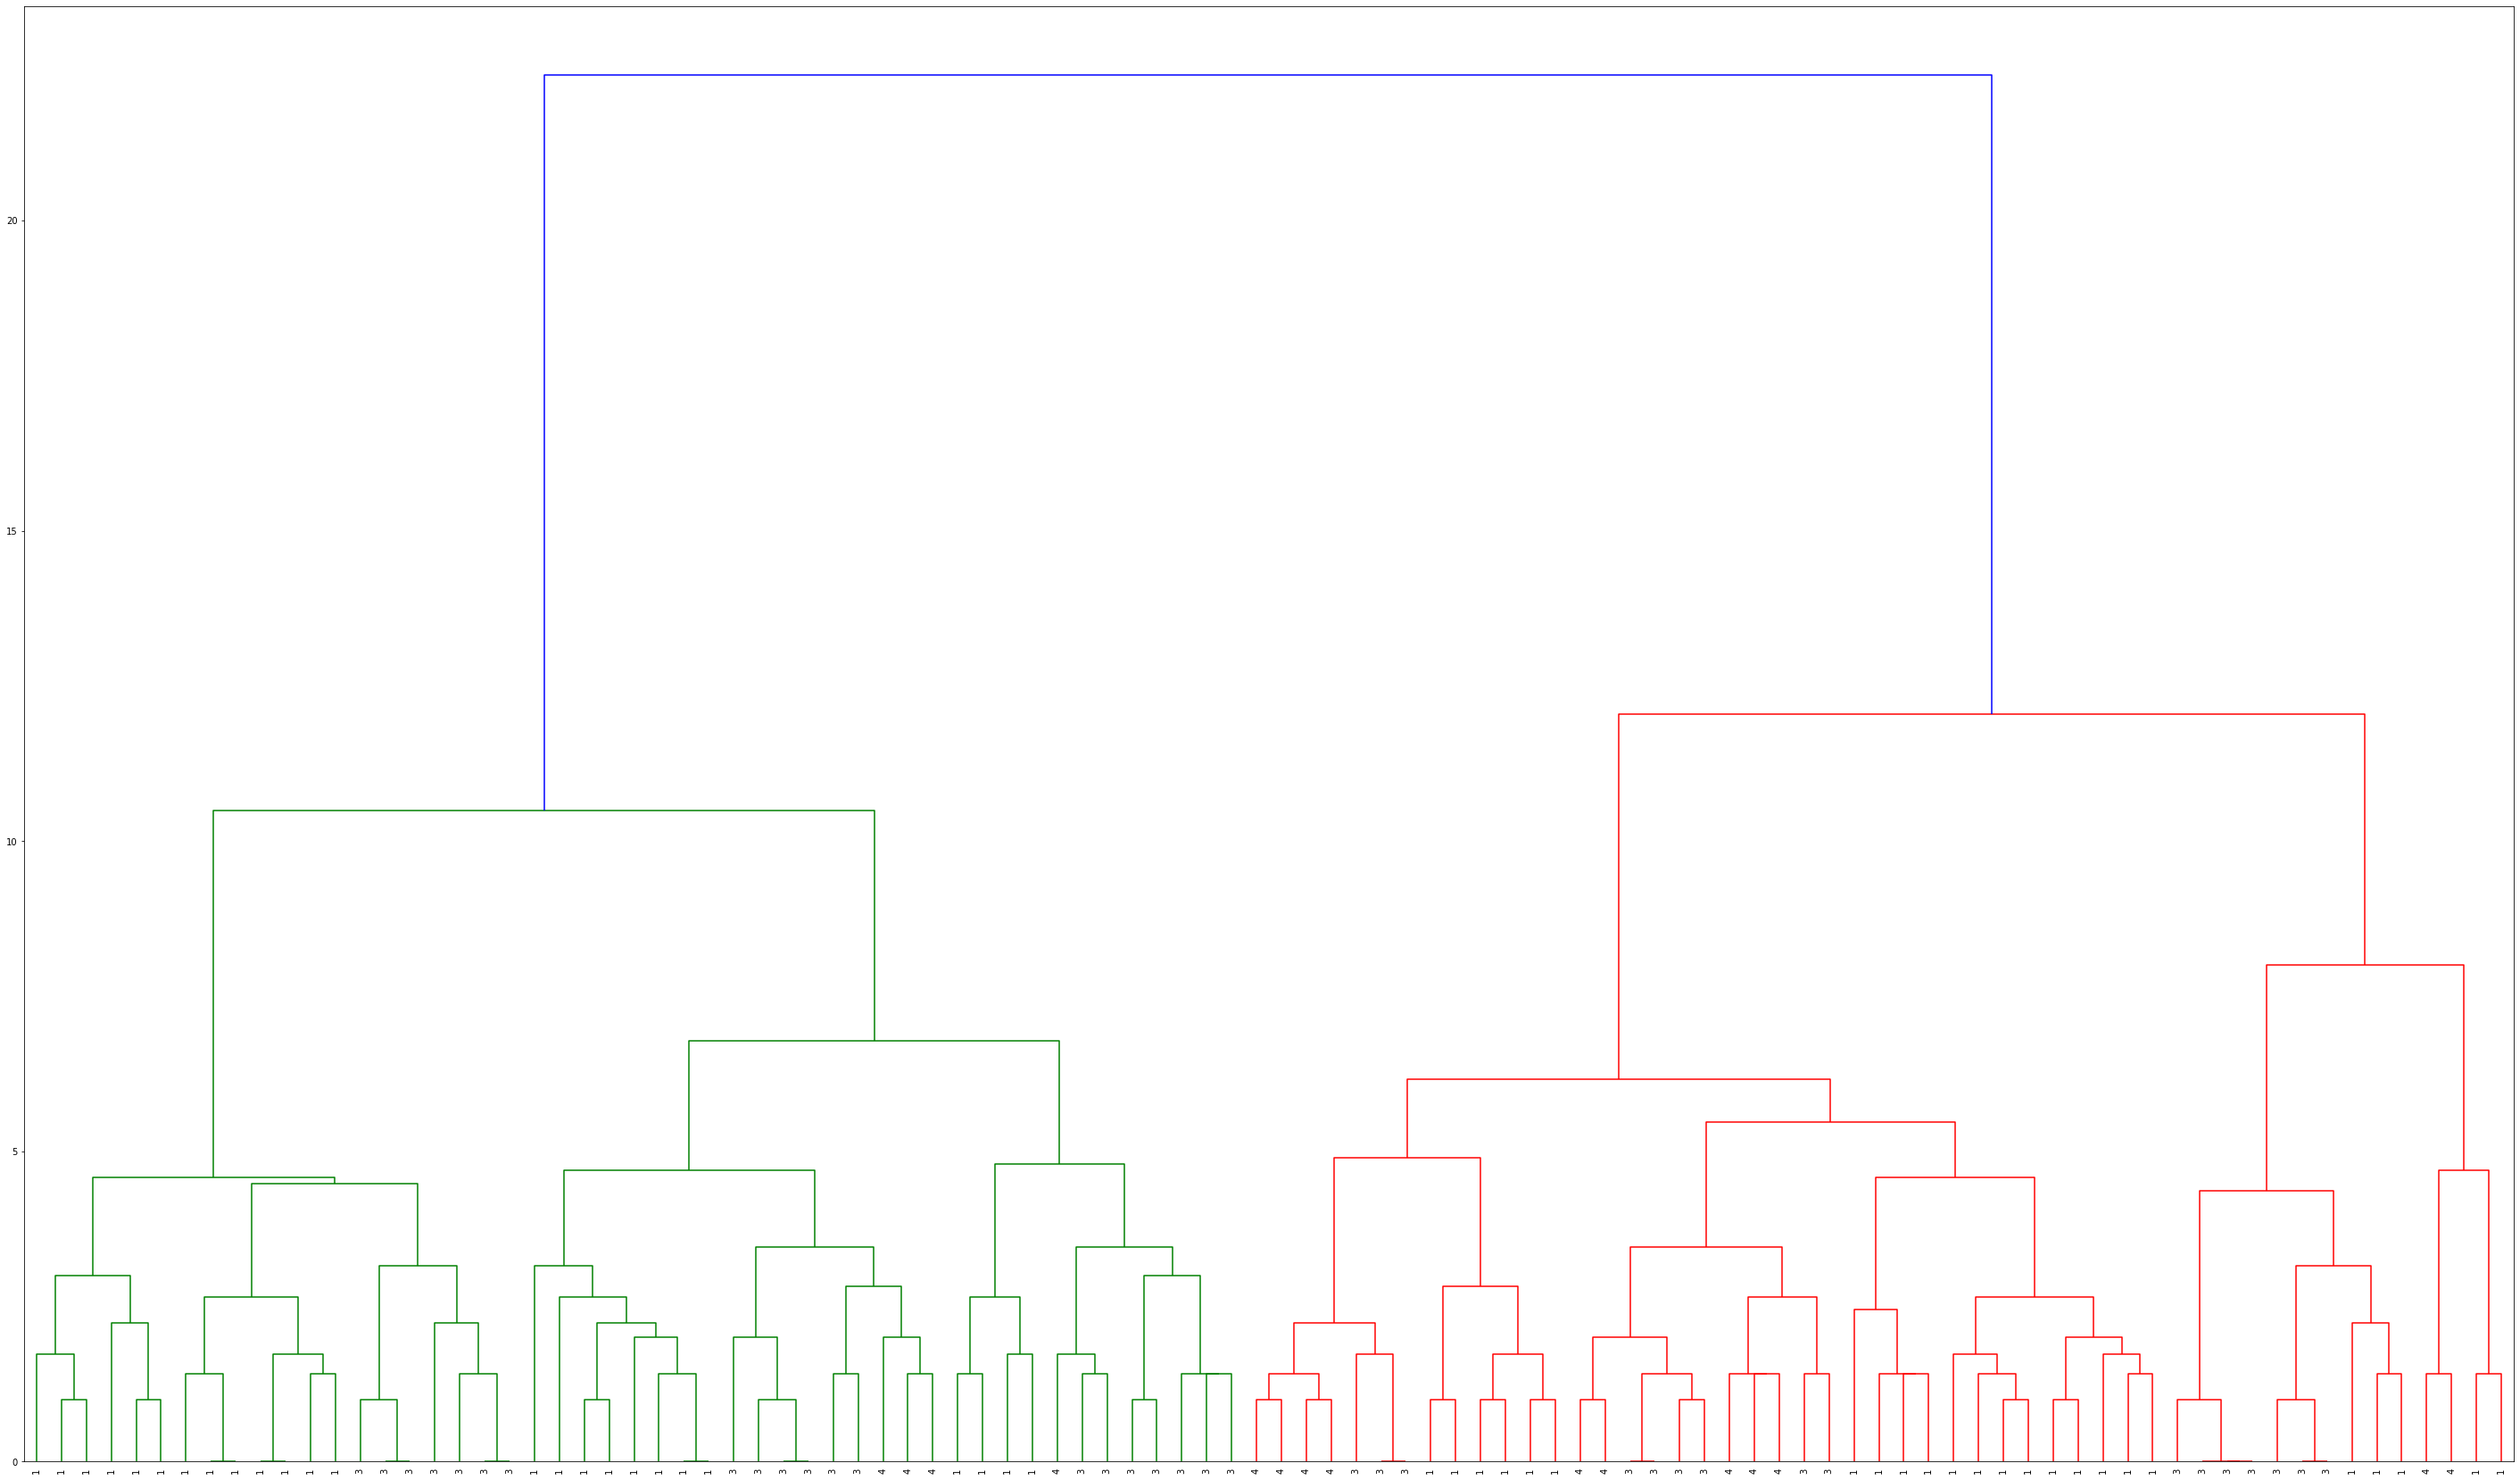

In [67]:
# dendrogram 

from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(data_cluster,method='complete')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(50,30))
dendrogram(mergings,
           labels = data_cluster['HEALTH2'].to_numpy(),
           leaf_rotation=90,
           leaf_font_size=10,
)
plt.show()

In [68]:
data_diabetes.head()

,SEX,BTH_G,SBP,DBP,FBS,DIS,BMI,SBP_Y,DBP_Y,FBS_Y,BMI_Y,HEALTH1,HEALTH2
218,1,1,130,80,130,4,27.5,1,1,1,1,1,4
763,1,1,135,85,130,4,31.6,1,1,1,1,1,4
862,1,1,110,60,128,4,21.8,0,0,1,0,1,1
946,1,1,124,62,129,4,21.5,1,0,1,0,1,1
1109,1,1,120,80,136,4,21.4,1,1,1,0,1,3


In [69]:
feature = data[['SEX', 'BTH_G', 'DIS', 'SBP_Y', 'DBP_Y', 'FBS_Y', 'BMI_Y', 'FBS_Y','SBP', 'DBP', 'FBS','BMI']]

In [70]:
label = data[['HEALTH2']]

In [71]:
model = KMeans(n_clusters=4,algorithm='auto')

model.fit(feature)  # 모델 학습
predict = pd.DataFrame(model.predict(feature))  # 모델 예측
predict.columns=['cluster_label']

In [72]:
feature.reset_index(drop=True, inplace=True)
predict.reset_index(drop=True, inplace=True)

new_data = pd.concat([feature, predict], axis = 1)

In [73]:
label.reset_index(drop = True, inplace = True)

new_data =  pd.concat([new_data, label], axis = 1)
new_data.head()

,SEX,BTH_G,DIS,SBP_Y,DBP_Y,FBS_Y,BMI_Y,FBS_Y,SBP,DBP,FBS,BMI,cluster_label,HEALTH2
0,1,1,4,0,0,0,0,0,116,78,94,16.6,3,0
1,1,1,4,0,0,0,0,0,100,60,79,22.3,3,0
2,1,1,4,0,0,0,0,0,100,60,87,21.9,3,0
3,1,1,4,0,0,0,0,0,111,70,72,20.2,3,0
4,1,1,4,1,1,0,0,0,120,80,98,20.0,3,2


In [74]:
new_data['cluster_label'].value_counts()

3    466631
0    400279
2    116710
1     16380
Name: cluster_label, dtype: int64

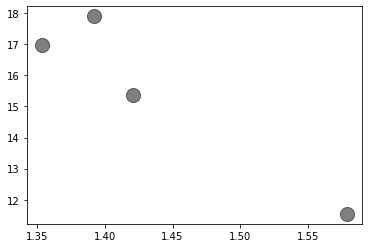

In [75]:
#plot 시각화

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [76]:
## 군집 별 특성 찾기 

diabetes_cluster1 = new_data[new_data['cluster_label']==0] 
diabetes_cluster2 = new_data[new_data['cluster_label']==1] 
diabetes_cluster3 = new_data[new_data['cluster_label']==2] 
diabetes_cluster4 = new_data[new_data['cluster_label']==3]  

In [77]:
def makestat(df):
    print(df.describe())
    print("***********************************************************************************")
    print(df.groupby('DIS').count())  # 성별 수 
    print("***********************************************************************************")
    print(df['HEALTH2'].value_counts()/df.count()[0]*100)    # HEALTH 구성 비율
    print("***********************************************************************************")
    print(df.groupby('SEX').count().loc[1,:][0]/df.count()[0]*100)  # 당뇨환자 비율 (에러발생 -> 당뇨환자 0인것)

In [78]:
makestat(diabetes_cluster1)

                 SEX          BTH_G            DIS          SBP_Y  \
count  400279.000000  400279.000000  400279.000000  400279.000000   
mean        1.420627      15.367529       3.352209       0.983212   
std         0.493660       6.836715       0.982599       0.128478   
min         1.000000       1.000000       1.000000       0.000000   
25%         1.000000      10.000000       2.000000       1.000000   
50%         1.000000      15.000000       4.000000       1.000000   
75%         2.000000      21.000000       4.000000       1.000000   
max         2.000000      27.000000       4.000000       1.000000   

               DBP_Y     FBS_Y          BMI_Y     FBS_Y            SBP  \
count  400279.000000  400279.0  400279.000000  400279.0  400279.000000   
mean        0.741865       0.0       0.213464       0.0     133.069242   
std         0.437609       0.0       0.409753       0.0      10.324099   
min         0.000000       0.0       0.000000       0.0     109.000000   
25%     

In [79]:
makestat(diabetes_cluster2)

                SEX         BTH_G           DIS         SBP_Y         DBP_Y  \
count  16380.000000  16380.000000  16380.000000  16380.000000  16380.000000   
mean       1.353602     16.968193      2.419658      0.750427      0.554090   
std        0.478102      5.766910      1.175416      0.432779      0.497081   
min        1.000000      1.000000      1.000000      0.000000      0.000000   
25%        1.000000     13.000000      1.000000      1.000000      0.000000   
50%        1.000000     17.000000      3.000000      1.000000      1.000000   
75%        2.000000     21.000000      3.000000      1.000000      1.000000   
max        2.000000     27.000000      4.000000      1.000000      1.000000   

         FBS_Y         BMI_Y    FBS_Y           SBP           DBP  \
count  16380.0  16380.000000  16380.0  16380.000000  16380.000000   
mean       1.0      0.271673      1.0    128.477534     79.052442   
std        0.0      0.444836      0.0     15.326965     10.048906   
min        1

In [80]:
makestat(diabetes_cluster3)

                 SEX          BTH_G            DIS          SBP_Y  \
count  116710.000000  116710.000000  116710.000000  116710.000000   
mean        1.391655      17.902716       2.728601       0.763131   
std         0.488122       5.949776       1.202373       0.425163   
min         1.000000       1.000000       1.000000       0.000000   
25%         1.000000      14.000000       2.000000       1.000000   
50%         1.000000      18.000000       3.000000       1.000000   
75%         2.000000      23.000000       4.000000       1.000000   
max         2.000000      27.000000       4.000000       1.000000   

               DBP_Y          FBS_Y          BMI_Y          FBS_Y  \
count  116710.000000  116710.000000  116710.000000  116710.000000   
mean        0.518105       0.467578       0.255745       0.467578   
std         0.499674       0.498950       0.436281       0.498950   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.0000

In [81]:
makestat(diabetes_cluster4)

                 SEX          BTH_G            DIS          SBP_Y  \
count  466631.000000  466631.000000  466631.000000  466631.000000   
mean        1.578408      11.543605       3.795573       0.184098   
std         0.493814       6.583935       0.621324       0.387565   
min         1.000000       1.000000       1.000000       0.000000   
25%         1.000000       6.000000       4.000000       0.000000   
50%         2.000000      11.000000       4.000000       0.000000   
75%         2.000000      16.000000       4.000000       0.000000   
max         2.000000      27.000000       4.000000       1.000000   

               DBP_Y          FBS_Y          BMI_Y          FBS_Y  \
count  466631.000000  466631.000000  466631.000000  466631.000000   
mean        0.099310       0.000006       0.085117       0.000006   
std         0.299078       0.002536       0.279055       0.002536   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.0000

In [82]:
data_diabetes.head()

,SEX,BTH_G,SBP,DBP,FBS,DIS,BMI,SBP_Y,DBP_Y,FBS_Y,BMI_Y,HEALTH1,HEALTH2
218,1,1,130,80,130,4,27.5,1,1,1,1,1,4
763,1,1,135,85,130,4,31.6,1,1,1,1,1,4
862,1,1,110,60,128,4,21.8,0,0,1,0,1,1
946,1,1,124,62,129,4,21.5,1,0,1,0,1,1
1109,1,1,120,80,136,4,21.4,1,1,1,0,1,3


In [83]:
group1 = diabetes_cluster1[['SBP', 'DBP',	'FBS',	'BMI']]
group2 = diabetes_cluster2[['SBP', 'DBP',	'FBS',	'BMI']]
group3 = diabetes_cluster3[['SBP', 'DBP',	'FBS',	'BMI']]
group4 = diabetes_cluster4[['SBP', 'DBP',	'FBS',	'BMI']]

In [84]:
plot_data = [group1, group2, group3, group4]

ValueError: cannot copy sequence with size 400279 to array axis with dimension 4

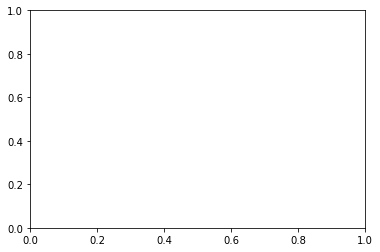

In [85]:
ax = plt.boxplot(plot_data)
plt.show()